In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

main = pd.read_csv('2023_box_scores.csv')
main = main.iloc[:, 1:]
main.head()

,Starters,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,team,game_id
0,Jacy Sheldon,37,10,19,0.526,8,14,0.571,2,5,...,2,4,2,5,0,4,2,28,ohio-state,2023-11-06-14-ohio-state
1,Celeste Taylor,35,1,8,0.125,0,3,0.000,1,5,...,3,3,2,2,0,2,5,7,ohio-state,2023-11-06-14-ohio-state
2,Cotie McMahon,34,3,11,0.273,2,8,0.250,1,3,...,4,5,2,1,0,5,4,7,ohio-state,2023-11-06-14-ohio-state
3,Taylor Thierry,33,5,6,0.833,5,5,1.000,0,1,...,6,8,0,2,0,2,3,16,ohio-state,2023-11-06-14-ohio-state
4,Rebeka Mikulasikova,21,2,5,0.400,2,3,0.667,0,2,...,3,4,1,0,0,1,1,8,ohio-state,2023-11-06-14-ohio-state


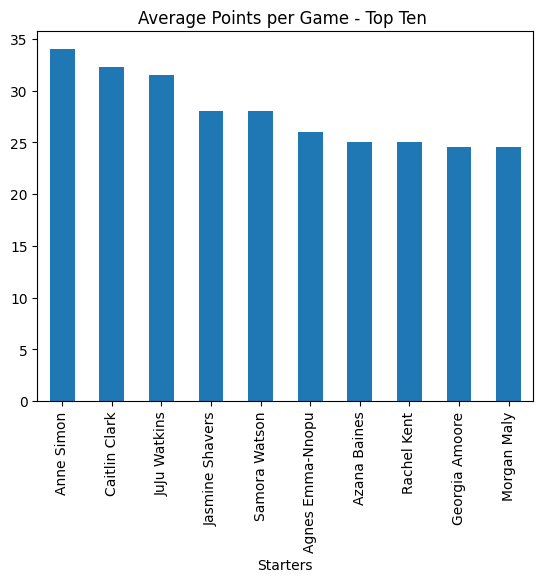

In [64]:
# average points by player
starters = main.groupby('Starters')['PTS'].agg(['mean', 'std'])
starters = starters.sort_values(by=['mean', 'std'], ascending=[False, False])

# chart top ten
top_10 = starters[:10]['mean'].plot(kind='bar')

plt.title('Average Points per Game - Top Ten ')
plt.show()

## Average Points per Minute


In [70]:
ppm = main.groupby('Starters')['MP', 'PTS'].mean()

ppm['ppm'] = ppm['PTS'] / ppm['MP']


# percent they are included in simulation
ppm['sim'] = ppm['MP'] / 60
#ppm.sort_values(by=['sim', 'ppm'], ascending=[False, False]).head(25)
ppm['rank'] = ppm['PTS'] * ppm['ppm']
ppm.sort_values(by=['rank'], ascending=False)

C:\Users\Geoff\AppData\Local\Temp\ipykernel_28664\2041376846.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ppm = main.groupby('Starters')['MP', 'PTS'].mean()


,MP,PTS,ppm,sim,rank
Starters,,,,,
Caitlin Clark,34.166667,32.266667,0.944390,0.569444,30.472325
Anne Simon,39.000000,34.000000,0.871795,0.650000,29.641026
JuJu Watkins,34.000000,31.500000,0.926471,0.566667,29.183824
Jasmine Shavers,33.000000,28.000000,0.848485,0.550000,23.757576
Samora Watson,36.000000,28.000000,0.777778,0.600000,21.777778
...,...,...,...,...,...
Hannah Nilges,1.000000,0.000000,0.000000,0.016667,0.000000
Brittany Harshaw,2.000000,0.000000,0.000000,0.033333,0.000000
Grace Moyers,0.000000,0.000000,NaN,0.000000,NaN
